## Module 2: Introducing DataFrames

### Pandas DataFrames Basics - Part 2
- Helpful Jupyter features
- Importing a CSV dataset
- Selecting multiple columns
- Counting True values in a Boolean series
- Filtering rows with Boolean masks
- Using AND and OR operators
- Why and when to use .copy
- Sorting a dataframe by one or more columns

In [ ]:
import pandas as pd

* Download the dataset from the link in the workbook
* Run below code, select and uplaod your file in Colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mpg.csv to mpg (1).csv


#mpg means miles per gallon

This dataset contains 234 observations about different car models and their characteristics, primarily focusing on fuel economy. It will help learners practice data exploration, cleaning, aggregation, and visualization using pandas.



| Column         | Description                                                 |
| -------------- | ----------------------------------------------------------- |
| `manufacturer` | Car manufacturer (e.g., Audi, Ford, Toyota)                 |
| `model`        | Specific model name                                         |
| `displ`        | Engine displacement in litres (numeric)                     |
| `year`         | Year of the model                                           |
| `cyl`          | Number of cylinders in the engine                           |
| `trans`        | Type of transmission (e.g., automatic, manual)              |
| `drv`          | Drive type: front-wheel (f), rear-wheel (r), or 4-wheel (4) |
| `cty`          | City miles per gallon (MPG) – a measure of fuel efficiency  |
| `hwy`          | Highway MPG                                                 |
| `fl`           | Fuel type (e.g., p = premium, r = regular, d = diesel)      |
| `class`        | Vehicle class (e.g., compact, SUV, pickup)                  |


In [ ]:
# pd.read_csv reads a comma-separated value file and returns a dataframe
mpg = pd.read_csv("mpg.csv")
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [ ]:
# Showing the object.tab autocomplete option
# Type the variable that's already been evaluated in memory
# This works with imported modules, too
# Type .
# Then type the <Tab> character
mpg.count?

In [ ]:
# Pulling up the docstring for a method
mpg.head?

In [ ]:
# .tail looks at the last records of a pandas object (series or datafram)
mpg.tail(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
233,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


In [ ]:
# The square brackets on the dataframe can accept a list of column names
columns_of_interest = ["displ", "cty", "hwy"]
mpg[columns_of_interest].head()

,displ,cty,hwy
0,1.8,18,29
1,1.8,21,29
2,2.0,20,31
3,2.0,21,30
4,2.8,16,26


In [ ]:
# You'll also see the same result with double square brackets
mpg[["cty", "hwy"]].head()

,cty,hwy
0,18,29
1,21,29
2,20,31
3,21,30
4,16,26


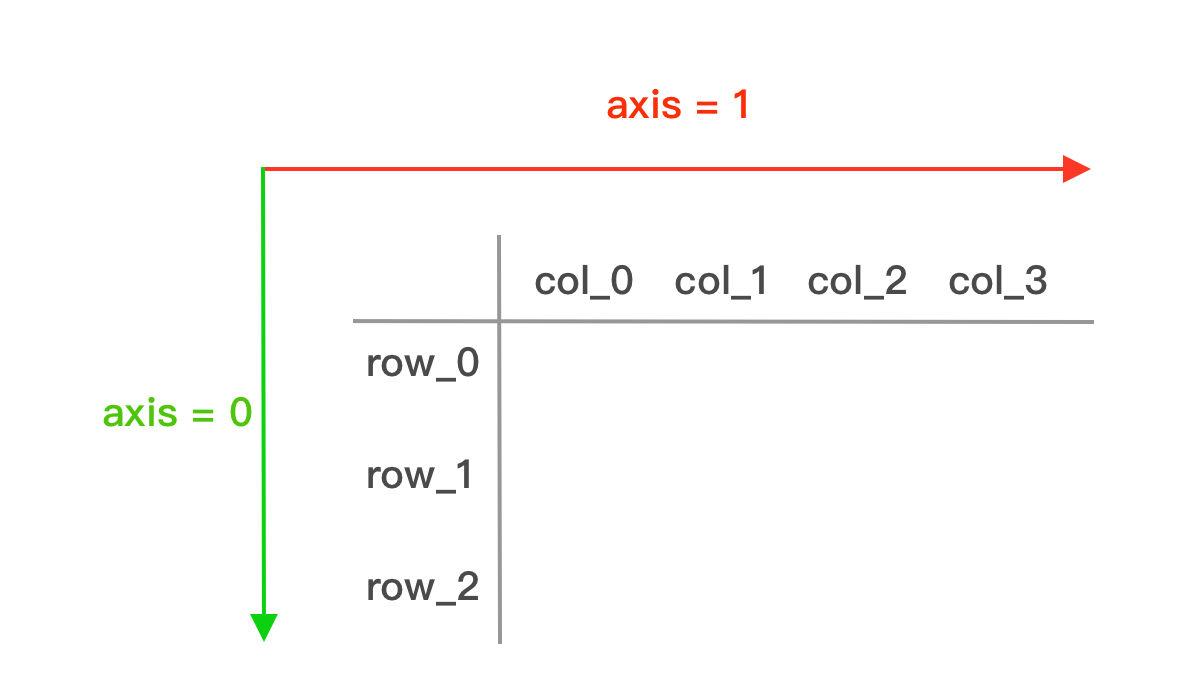

In [ ]:
# Our functions like .mean, .sum, .median, min/max evaluate an entire column, by default
# There's a default argument in .mean() that's axis=0 (which means column)
mpg[["cty", "hwy"]].mean(axis=0)

,0
cty,16.858974
hwy,23.440171


In [ ]:
mpg[["cty", "hwy"]].head()

,cty,hwy
0,18,29
1,21,29
2,20,31
3,21,30
4,16,26


In [ ]:
# axis=1 means execute the .mean on each row, row-wise execution
mpg[["cty", "hwy"]].mean(axis=1).head()

,0
0,23.5
1,25.0
2,25.5
3,25.5
4,21.0


In [ ]:
# axis=1 calculates the row-wise average
mpg["average_mileage"] = mpg[["cty", "hwy"]].mean(axis=1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [ ]:
# value_counts shows unique values and their distribution
mpg.cyl.value_counts()

,count
cyl,
4,81
6,79
8,70
5,4


In [ ]:
# Using Boolean Series to answer questions
# How many audis in the dataset
# True works as a 1, False works as 0
(mpg.manufacturer == "audi").sum()

np.int64(18)

In [ ]:
# What proportion of engines are 4 cylinders?
(mpg.cyl == 4).mean()

np.float64(0.34615384615384615)

In [ ]:
# Using Boolean Series to filter a dataframe
mpg[mpg.cyl == 5]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
217,volkswagen,jetta,2.5,2008,5,auto(s6),f,21,29,r,compact,25.0
218,volkswagen,jetta,2.5,2008,5,manual(m5),f,21,29,r,compact,25.0
225,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact,24.0
226,volkswagen,new beetle,2.5,2008,5,auto(s6),f,20,29,r,subcompact,24.5


In [ ]:
# You can mix and match the columns used to generate Booleans, the Boolean values don't care
mpg[(mpg.model == "maxima") | (mpg.cyl == 5)]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
147,nissan,maxima,3.0,1999,6,auto(l4),f,18,26,r,midsize,22.0
148,nissan,maxima,3.0,1999,6,manual(m5),f,19,25,r,midsize,22.0
149,nissan,maxima,3.5,2008,6,auto(av),f,19,25,p,midsize,22.0
217,volkswagen,jetta,2.5,2008,5,auto(s6),f,21,29,r,compact,25.0
218,volkswagen,jetta,2.5,2008,5,manual(m5),f,21,29,r,compact,25.0
225,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact,24.0
226,volkswagen,new beetle,2.5,2008,5,auto(s6),f,20,29,r,subcompact,24.5


In [ ]:
# AND limits options. Both predicates must be true
mpg[(mpg["class"] == "midsize") & (mpg["displ"] < 2)]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
227,volkswagen,passat,1.8,1999,4,manual(m5),f,21,29,p,midsize,25.0
228,volkswagen,passat,1.8,1999,4,auto(l5),f,18,29,p,midsize,23.5


In [ ]:
original_df = pd.DataFrame({"x": [1, 2, 3]})
original_df

,x
0,1
1,2
2,3


In [ ]:
# Be careful assigning Python collections like this...
# This works the same way with lists, dictionaries, and many other collection objects
new_df = original_df

In [ ]:
original_df["y"] = original_df.x * 100
original_df

,x,y
0,1,100
1,2,200
2,3,300


In [ ]:
new_df

,x,y
0,1,100
1,2,200
2,3,300


In [ ]:
# Use .copy to make a proper copy of a dataframe
new_df = original_df.copy()
new_df

,x,y
0,1,100
1,2,200
2,3,300


In [ ]:
original_df["z"] = 5000
original_df

,x,y,z
0,1,100,5000
1,2,200,5000
2,3,300,5000


In [ ]:
# The new df was created from a copy and avoids future mutation to the original dataframe
new_df

,x,y
0,1,100
1,2,200
2,3,300


In [ ]:
# Sorting by a single column
mpg.sort_values(by=["average_mileage"], ascending=False, ignore_index=True).head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
0,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,39.5
1,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,38.5
2,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,35.0
3,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,32.5
4,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,30.5


In [ ]:
# Sorting by multiple columns
mpg.sort_values(by=["hwy", "cty"], ascending=False, ignore_index=True).head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
0,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,39.5
1,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,38.5
2,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,35.0
3,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,32.5
4,honda,civic,1.8,2008,4,auto(l5),f,25,36,r,subcompact,30.5


In [ ]:
# Updating the dataframe to store the sorted values
# Use inplace=True or reassign the dataframe variable (not both)
mpg.sort_values(by="displ", ascending=False, ignore_index=True, inplace=True)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
0,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,19.5
1,chevrolet,k1500 tahoe 4wd,6.5,1999,8,auto(l4),4,14,17,d,suv,15.5
2,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater,20.0
3,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,21.0
4,jeep,grand cherokee 4wd,6.1,2008,8,auto(l5),4,11,14,p,suv,12.5


In [ ]:
mpg[["cyl", "displ"]].corr()

,cyl,displ
cyl,1.000000,0.930227
displ,0.930227,1.000000


In [ ]:
mpg[["cyl", "displ", "average_mileage"]].corr()
#higher the number of cylinders lower the average mileage
#higher the displace lower the average mileage


,cyl,displ,average_mileage
cyl,1.000000,0.930227,-0.788691
displ,0.930227,1.000000,-0.788059
average_mileage,-0.788691,-0.788059,1.000000


In [ ]:
# top 5 car with highest average milage
mpg.nlargest(5,"average_mileage")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
213,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,39.5
214,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,38.5
212,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,35.0
220,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,32.5
221,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,30.5


In [ ]:
# top 5 car with lowest average milage
mpg.nsmallest(5,"average_mileage")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
42,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,10.5
48,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,10.5
49,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,10.5
52,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv,10.5
54,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup,10.5


# create another columns to represent mpg cty, hwy  and average mileage as miles per litre

In [ ]:
# miles per gallon to miles per litre conversion
mpg_to_mpl = 0.425144

In [ ]:
# creating new column for city
mpg['city_mpl'] = mpg['cty'] * mpg_to_mpl

In [ ]:
# display top mpl
mpg.nlargest(5,"city_mpl")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,city_mpl
213,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,39.5,14.880040
214,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,38.5,14.029752
212,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,35.0,12.329176
220,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,32.5,11.904032
230,honda,civic,1.6,1999,4,manual(m5),f,28,33,r,subcompact,30.5,11.904032


In [ ]:
# creating new column for highway
mpg['hwy_mpl'] = mpg['hwy'] * mpg_to_mpl

In [ ]:
# creating new column for average
mpg['avg_mpl'] = ((mpg['cty'] + mpg['hwy']) / 2) * mpg_to_mpl

In [ ]:
mpg.nlargest(5,"avg_mpl")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,city_mpl,hwy_mpl,avg_mpl
213,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,39.5,14.880040,18.706336,16.793188
214,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,38.5,14.029752,18.706336,16.368044
212,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,35.0,12.329176,17.430904,14.880040
220,toyota,corolla,1.8,2008,4,manual(m5),f,28,37,r,compact,32.5,11.904032,15.730328,13.817180
221,toyota,corolla,1.8,2008,4,auto(l4),f,26,35,r,compact,30.5,11.053744,14.880040,12.966892


In [ ]:
mpg.nsmallest(1,"avg_mpl")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,city_mpl,hwy_mpl,avg_mpl
42,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup,10.5,3.826296,5.101728,4.464012


In [ ]:
# 500 miles in UK with avg_mpl of 15
# 500/15 = 33 litres *1.5 = £50
# 500 miles avg_mpl 5
# 500/5 = 100litres = £150

## Additional Resources
- [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
- [Pandas Comparison to Spreadsheets](https://pandas.pydata.org/docs/dev/getting_started/comparison/comparison_with_spreadsheets.html)
- [Pandas Comparison to SQL](https://pandas.pydata.org/docs/dev/getting_started/comparison/comparison_with_sql.html)

## Exercises
- Create a new column named `is_automatic` that holds a Boolean if that given vehicle is an automatic transmition or not.
- Use the `is_automatic` column to sum up the number of automatic vehicles in this dataset.
- Write the pandas code to determine what percentage of the vehicles are subcompacts?
- Combined fuel economy is a weighted average of the city value by 55% and the highway value by 45%. Use arithmetic operators to add a new column named `fuel_economy` to the `mpg` dataframe.
- Use Boolean masking to find all of the vehicles with a `fuel_economy` above the median `fuel_economy`.



In [ ]:
#Create a new column named is_automatic that holds a Boolean if that given vehicle is an automatic transmition or not.
mpg['is_automatic'] = mpg['trans'].str.contains('auto')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,city_mpl,hwy_mpl,avg_mpl,is_automatic
0,chevrolet,corvette,7.0,2008,8,manual(m6),r,15,24,p,2seater,19.5,6.377160,10.203456,8.290308,False
1,chevrolet,k1500 tahoe 4wd,6.5,1999,8,auto(l4),4,14,17,d,suv,15.5,5.952016,7.227448,6.589732,True
2,chevrolet,corvette,6.2,2008,8,auto(s6),r,15,25,p,2seater,20.0,6.377160,10.628600,8.502880,True
3,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,21.0,6.802304,11.053744,8.928024,False
4,jeep,grand cherokee 4wd,6.1,2008,8,auto(l5),4,11,14,p,suv,12.5,4.676584,5.952016,5.314300,True


In [ ]:
# Use the `is_automatic` column to sum up the number of automatic vehicles in this dataset.
print(mpg['is_automatic'].sum())

157


In [ ]:
# Write the pandas code to determine what percentage of the vehicles are subcompacts?
subcompact_count = (mpg['class'] == 'subcompact').sum()
# how many car as subcompacts?
print(subcompact_count)
# total number of cars
total_count = len(mpg)
print(total_count)


35
234


In [ ]:
# Create a `fuel_economy` column. Fuel economy is a weighted average of the city value by 55% and the highway value by 45%
mpg['fuel_economy'] = (mpg['cty'] * 0.55) + (mpg['hwy'] * 0.45)

In [ ]:
# Use Boolean masking to find all of the vehicles with a `fuel_economy` above the median `fuel_economy`.
median_fuel_economy = mpg['fuel_economy'].median()
print(median_fuel_economy)

20.150000000000002
